## Imports

In [1]:
import os

import numpy as np
import librosa
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## MFCC

In [2]:
# Define feature extraction function
def extract_mfcc_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

In [3]:
# Define data loading function
def load_data(data_dir, n_classes=9, n_mfcc=13):
    features = []
    labels = []
    for label in range(n_classes):
        class_dir = os.path.join(data_dir, str(label))
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            mfccs = extract_mfcc_features(file_path, n_mfcc)
            features.append(mfccs)
            labels.append(label)
    return np.array(features), np.array(labels)

In [6]:
# Load dataset and extract features
data_dir = 'Datasets/Augment_KNN/'  # Path to your dataset directory
n_classes = 10  # Number of classes (9 classes of gunshots)
n_mfcc = 13  # Number of MFCC features

features, labels = load_data(data_dir, n_classes, n_mfcc)

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Apply PCA (optional, for dimensionality reduction)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [35]:
# Build and train the KNN model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=15)

In [36]:
# Evaluate the model
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 78.60%


In [37]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       223
           1       1.00      0.96      0.98       223
           2       0.76      0.84      0.80       220
           3       0.39      0.40      0.39       226
           4       0.41      0.45      0.43       211
           5       0.86      0.80      0.83       220
           6       0.93      0.80      0.86       216
           7       0.82      0.70      0.75       205
           8       0.92      0.97      0.94       228
           9       0.88      0.91      0.89       266

    accuracy                           0.79      2238
   macro avg       0.79      0.78      0.78      2238
weighted avg       0.79      0.79      0.79      2238



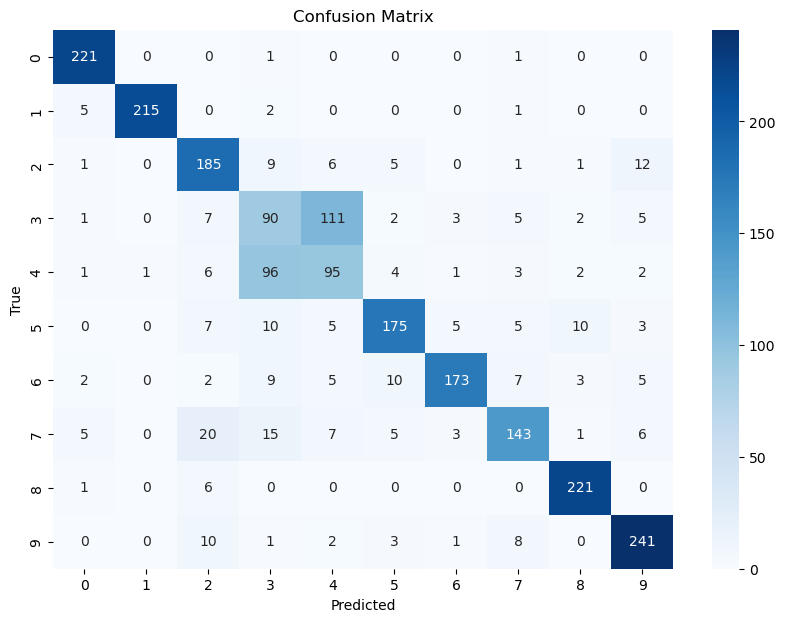

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()